# **EDA Script for CW1 - Exploratory Data Analysis**

## 1. Loading stuff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

trn = pd.read_csv('data/CW1_train.csv')

# gives us (rows, columns)
print(f"Training set size: {trn.shape[0]} rows, {trn.shape[1]} columns")

# tells us what type each column is important because
# we handle numeric vs categorical features differently
print(f"\nColumn types:\n{trn.dtypes.value_counts()}")

# Check for missing values
# whether to drop those rows or fill them in (imputation)
missing = trn.isnull().sum()
if missing.sum() == 0:
    print("\nNo missing values — great, nothing to impute.")
else:
    print(f"\nMissing values:\n{missing[missing > 0]}")

Training set size: 10000 rows, 31 columns

Column types:
float64    27
str         3
int64       1
Name: count, dtype: int64

No missing values — great, nothing to impute.


## 2. Target variable understanding

count    10000.000
mean        -4.979
std         12.722
min        -44.879
25%        -13.990
50%         -5.443
75%          3.919
max         39.676
Name: outcome, dtype: float64


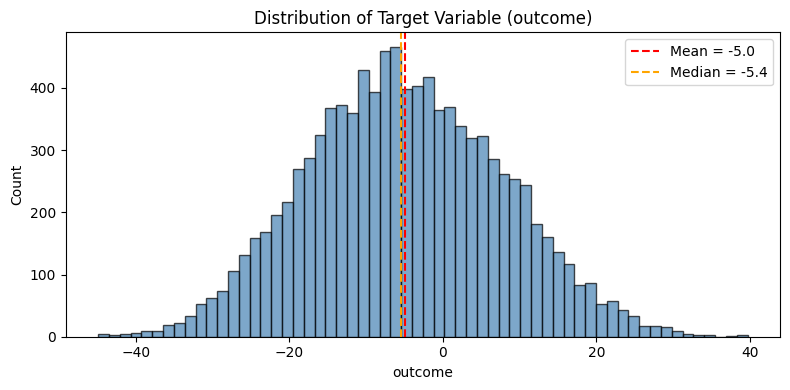

In [ ]:
print(trn['outcome'].describe().round(3))

# Note to self:
# Why do we care about the distribution of outcome?
# - If it's heavily skewed, we might transform it to log for example
# - If there are extreme outliers, they could dominate the loss function so we'll have to remove em of cap em (winsorsizing)

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(trn['outcome'], bins=60, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(trn['outcome'].mean(), color='red', linestyle='--',
           label=f"Mean = {trn['outcome'].mean():.1f}")
ax.axvline(trn['outcome'].median(), color='orange', linestyle='--',
           label=f"Median = {trn['outcome'].median():.1f}")
ax.set_xlabel('outcome')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Variable (outcome)')
ax.legend()
plt.tight_layout()
plt.show()

## 3. UNDERSTAND FEATURES


Diamond measurements:
           carat      depth      table      price          x          y  \
count  10000.000  10000.000  10000.000  10000.000  10000.000  10000.000   
mean       0.798     61.748     57.467   3910.842      5.734      5.742   
std        0.472      1.430      2.247   3940.370      1.115      1.228   
min        0.200     50.800     44.000    326.000      0.000      0.000   
25%        0.400     61.000     56.000    965.000      4.730      4.740   
50%        0.710     61.900     57.000   2441.000      5.700      5.720   
75%        1.040     62.500     59.000   5226.000      6.530      6.530   
max        4.000     70.500     73.000  18791.000     10.010     58.900   

               z  
count  10000.000  
mean       3.541  
std        0.693  
min        0.000  
25%        2.920  
50%        3.530  
75%        4.030  
max        8.060  

Categorical features:

  cut: 5 levels
  {'Ideal': 4040, 'Premium': 2439, 'Very Good': 2296, 'Good': 925, 'Fair': 300}

  color: 

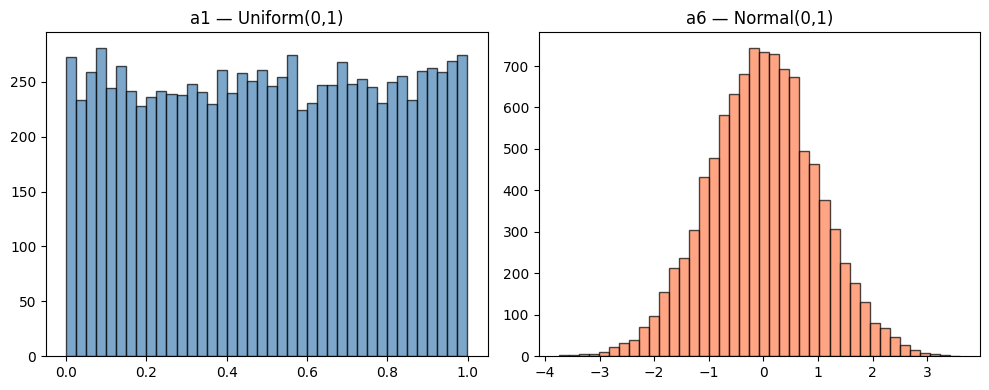

In [ ]:
print("\nDiamond measurements:")
print(trn[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].describe().round(3))

print("\nCategorical features:")
for col in ['cut', 'color', 'clarity']:
    print(f"\n  {col}: {trn[col].nunique()} levels")
    print(f"  {trn[col].value_counts().to_dict()}")

print("\nMystery feature distributions")
uniform_feats = [f'{p}{i}' for p in ['a','b'] for i in range(1,6)]
normal_feats  = [f'{p}{i}' for p in ['a','b'] for i in range(6,11)]
print(f"Uniform(0,1) group — mean: {trn[uniform_feats].mean().mean():.3f}, "
      f"std: {trn[uniform_feats].std().mean():.3f}")
print(f"Normal(0,1) group  — mean: {trn[normal_feats].mean().mean():.3f}, "
      f"std: {trn[normal_feats].std().mean():.3f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(trn['a1'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('a1 — Uniform(0,1)')
axes[1].hist(trn['a6'], bins=40, alpha=0.7, color='coral', edgecolor='black')
axes[1].set_title('a6 — Normal(0,1)')
plt.tight_layout()
plt.show()

## 4. CORRELATIONS (features)


Correlation with outcome (sorted by |r|):
depth   -0.4111
b3       0.2254
b1       0.1737
a1       0.1491
a4       0.1224
table    0.1150
z       -0.0315
x        0.0204
price    0.0170
y        0.0159
a7       0.0125
b5       0.0124
b10     -0.0120
b7      -0.0092
a2       0.0088
a8       0.0080
b9      -0.0073
a6       0.0072
a9       0.0054
b4      -0.0038
a3       0.0031
b8      -0.0026
carat    0.0025
a10      0.0025
b2       0.0016
a5       0.0007
b6       0.0001


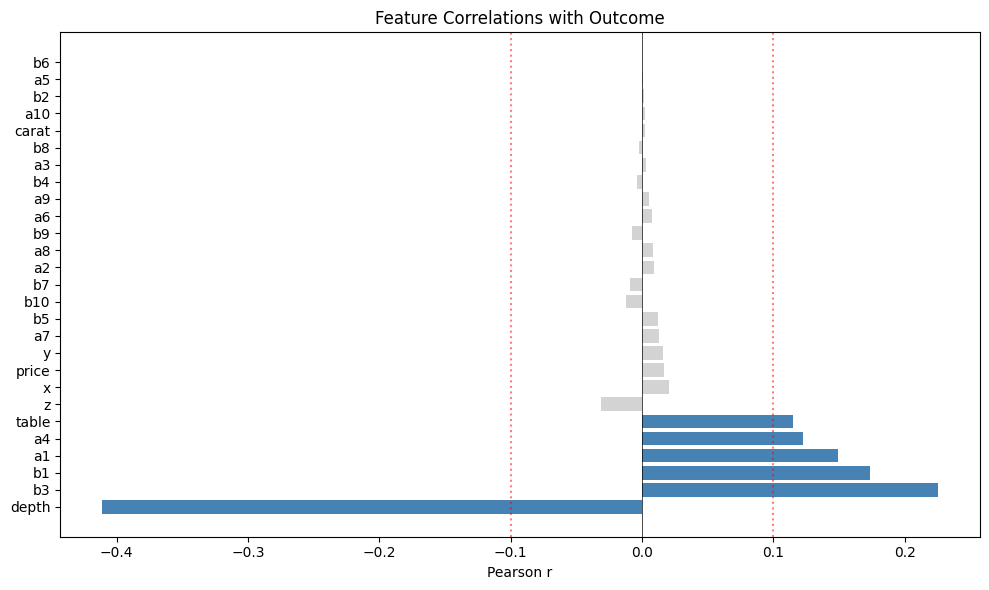

In [ ]:
numeric_cols = trn.select_dtypes(include=[np.number]).columns.drop('outcome')
corrs = trn[numeric_cols].corrwith(trn['outcome']).sort_values(key=abs, ascending=False)
print("\nCorrelation with outcome (sorted by |r|):")
print(corrs.round(4).to_string())

# Visualise as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['steelblue' if abs(c) > 0.1 else 'lightgray' for c in corrs]
ax.barh(corrs.index, corrs.values, color=colors)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title('Feature Correlations with Outcome')
ax.set_xlabel('Pearson r')
ax.axvline(0.1, color='red', linestyle=':', alpha=0.5)
ax.axvline(-0.1, color='red', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

## 5. MULTICOLLINEARITY - correlations between features

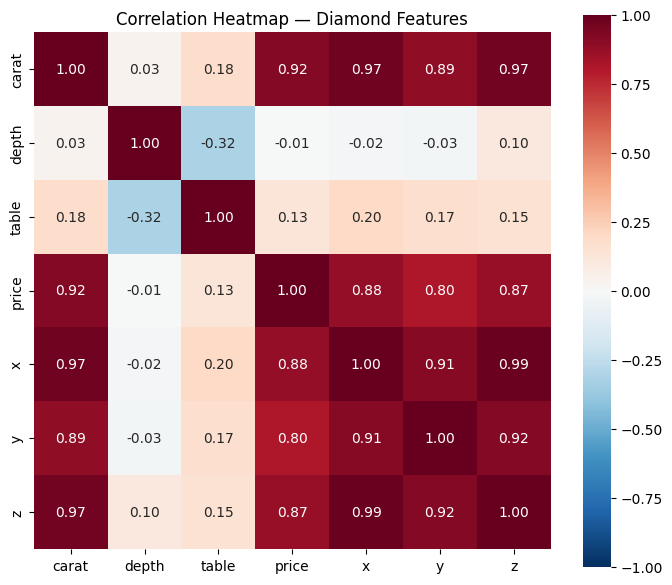


Highly correlated pairs (|r| > 0.90):
  carat — price: r = 0.921
  carat — x: r = 0.972
  carat — z: r = 0.967
  x — y: r = 0.909
  x — z: r = 0.986
  y — z: r = 0.915


In [ ]:
diamond_feats = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
corr_matrix = trn[diamond_feats].corr()

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, ax=ax, square=True, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap — Diamond Features')
plt.tight_layout()
plt.show()

print("\nHighly correlated pairs (|r| > 0.90):")
for i in range(len(diamond_feats)):
    for j in range(i+1, len(diamond_feats)):
        r = corr_matrix.iloc[i, j]
        if abs(r) > 0.90:
            print(f"  {diamond_feats[i]} — {diamond_feats[j]}: r = {r:.3f}")

In [ ]:
# Pairplot of diamond features to spot anomalies
# Using a sample of 1000 rows so it doesn't take forever
diamond_cols = ['outcome', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sample = trn[diamond_cols].sample(1000, random_state=42)
sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10})
plt.suptitle('Diamond Features Pairplot (n=1000 sample)', y=1.01)
plt.show()

## 6. DATA QUALITY — outliers and suspicious values

In [ ]:
# Diamonds can't have 0 dimensions — these are likely data entry errors
zero_dims = trn[(trn['x'] == 0) | (trn['y'] == 0) | (trn['z'] == 0)]
print(f"\nRows with x=0, y=0, or z=0: {len(zero_dims)}")
if len(zero_dims) > 0:
    print(zero_dims[['outcome', 'carat', 'x', 'y', 'z']].to_string())

# The y column has a max of 58.9, but the 99th percentile is ~8.4
# That's a clear outlier (probably a typo — maybe meant 5.89?)
print(f"\ny column: max = {trn['y'].max()}, "
      f"99th percentile = {trn['y'].quantile(0.99):.2f}")
big_y = trn[trn['y'] > 20]
print(f"Rows with y > 20: {len(big_y)}")
if len(big_y) > 0:
    print(big_y[['outcome', 'carat', 'x', 'y', 'z']].to_string())


Rows with x=0, y=0, or z=0: 4
        outcome  carat     x     y    z
2634  16.558572   1.00  6.55  6.48  0.0
2722  -7.873141   0.71  0.00  0.00  0.0
4729   8.877149   1.15  6.88  6.83  0.0
8336   5.281700   2.25  0.00  0.00  0.0

y column: max = 58.9, 99th percentile = 8.36
Rows with y > 20: 1
        outcome  carat     x     y     z
9471 -16.813965    2.0  8.09  58.9  8.06


## 7. SCATTER PLOTS 

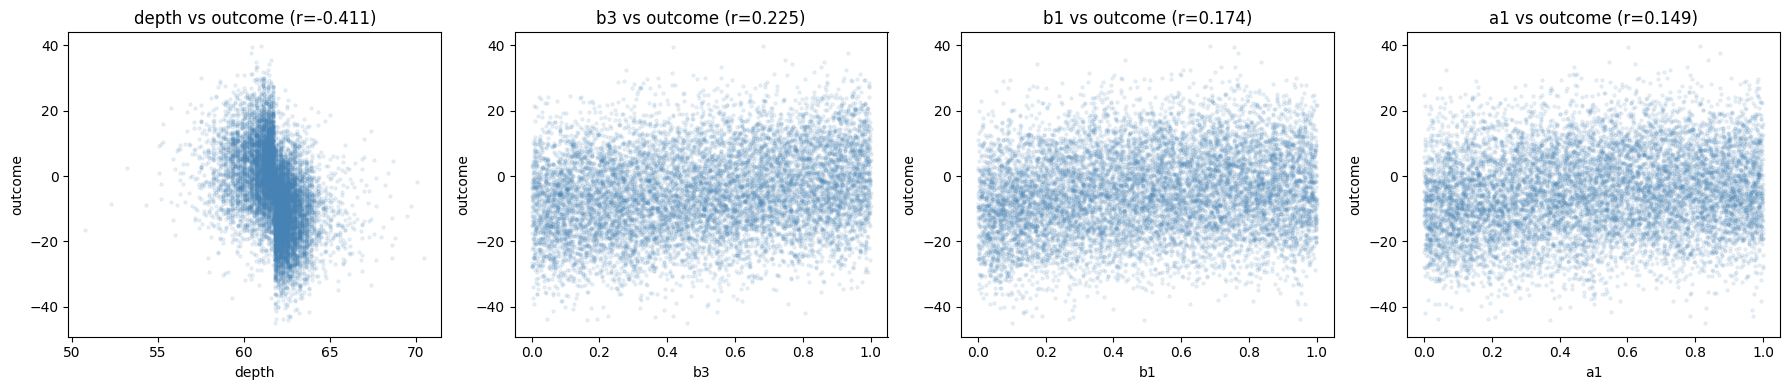

In [ ]:
top_feats = corrs.head(4).index.tolist()
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
for i, feat in enumerate(top_feats):
    axes[i].scatter(trn[feat], trn['outcome'], alpha=0.1, s=5, color='steelblue')
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel('outcome')
    r = trn[feat].corr(trn['outcome'])
    axes[i].set_title(f'{feat} vs outcome (r={r:.3f})')
plt.tight_layout()
plt.show()

## 8. BOXPLOTS

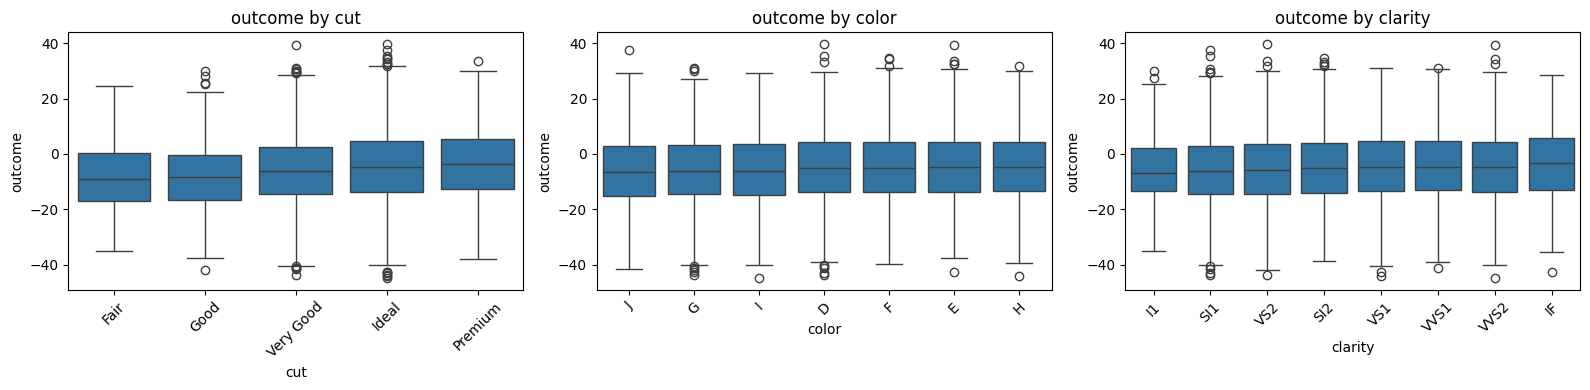

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, col in enumerate(['cut', 'color', 'clarity']):
    # Order by median outcome for clearer visual
    order = trn.groupby(col)['outcome'].median().sort_values().index
    sns.boxplot(data=trn, x=col, y='outcome', order=order, ax=axes[i])
    axes[i].set_title(f'outcome by {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()